# Exploring the MNIST Digits Dataset

## Importing Data

In [ ]:
# Import necessary libraries for data handling, visualization, and deep learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

# Load the MNIST dataset (handwritten digits) from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Exploring Data

In [ ]:
# Check the shape (dimensions) of the training and test data
print(f"x_train shape: {x_train.shape}")  # Images for training
print(f"y_train shape: {y_train.shape}")  # Labels for training

print(f"x_test shape: {x_test.shape}")   # Images for testing
print(f"y_test shape: {y_test.shape}")   # Labels for testing

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


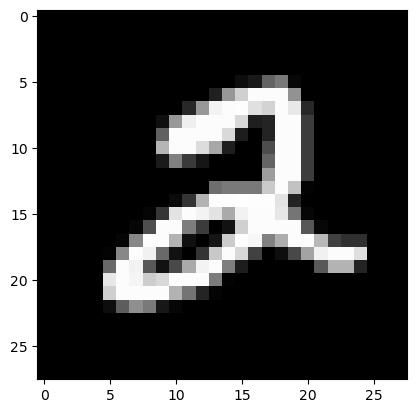

correct number: 2


In [ ]:
# Visualize a single image from the training data to see what it looks like
img_no = 5 # Change this number to display a different example

first_number = x_train[img_no]  # Select one image from the training set
plt.imshow(first_number, cmap='gray') # Show the image in grayscale
plt.show() # Display the image
print(f"correct number: {y_train[img_no]}") # Print the actual label for the image

## Preparing Data & Splitting

In [ ]:
# Reshape the data so each image has a single color channel (needed for Keras CNN)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# Normalize the pixel values to be between 0 and 1 (helps model training)
x_train = x_train / 255
x_test = x_test / 255

# Print the new shapes to confirm changes
print(f"train X shape: {x_train.shape}")
print(f"test X shape: {x_test.shape}")

train X shape: (60000, 28, 28, 1)
test X shape: (10000, 28, 28, 1)


## Model Building

In [ ]:
# Build a Convolutional Neural Network (CNN) model for digit recognition
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(28,28,1), name="input_image")) # Input layer for 28x28 images
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu')) # First convolutional layer
model.add(keras.layers.MaxPool2D(2, 2)) # First pooling layer

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu')) # Second convolutional layer
model.add(keras.layers.MaxPool2D(2, 2)) # Second pooling layer

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu')) # Third convolutional layer
model.add(keras.layers.MaxPool2D(3, 3)) # Third pooling layer

model.add(keras.layers.Flatten()) # Flatten the output for dense layers
model.add(keras.layers.Dense(64, activation='relu')) # Dense layer for learning patterns
model.add(keras.layers.Dense(32, activation='relu')) # Another dense layer
model.add(keras.layers.Dense(10, activation='softmax')) # Output layer for 10 digit classes
model.summary() # Show the model structure

/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model to get it ready for training
model.compile(optimizer="adam", # Use Adam optimizer for training
              loss="sparse_categorical_crossentropy", # Use this loss for multi-class classification
              metrics=['accuracy']) # Track accuracy during training

In [ ]:
# Train (fit) the model using the training data
history = model.fit(
  x=x_train, # Training images
  y=y_train, # Training labels
  epochs=2 # Number of times to go through the data
  # You can increase epochs for better accuracy
 )

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8169 - loss: 0.5376
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9780 - loss: 0.0708


## Export model for inference

In [ ]:
import os

# Set up the folder where the model will be exported
export_base = "./tmp/detect-digits"
version = "1" # Version number for the model
export_path = os.path.join(export_base, version)
os.makedirs(export_path, exist_ok=True) # Create the folder if it doesn't exist

# Export the trained model as a TensorFlow SavedModel (for serving/inference)
model.export(
    export_path, format='tf_saved_model' # Save in TensorFlow format for deployment
)

INFO:tensorflow:Assets written to: ./tmp/detect-digits/1/assets


INFO:tensorflow:Assets written to: ./tmp/detect-digits/1/assets


Saved artifact at './tmp/detect-digits/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_image')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134856172341968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134856175710864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134856172341392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134856172348112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134856172348880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134856172351760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134856172350224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134856172351952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134856172352720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134856172346768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13485617235

## Model Evaluation

In [ ]:
# Save the trained model in Keras format for later use 
model.save("./tmp/detect-digits/model.keras")

In [ ]:
# Load the saved Keras model from disk for evaluation 
model = keras.models.load_model("./tmp/detect-digits/model.keras")

In [ ]:
# Evaluate the model's performance on the test dataset
model_loss, model_accuracy = model.evaluate(x=x_test,y=y_test) # Returns loss and accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9833 - loss: 0.0508   


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual')]

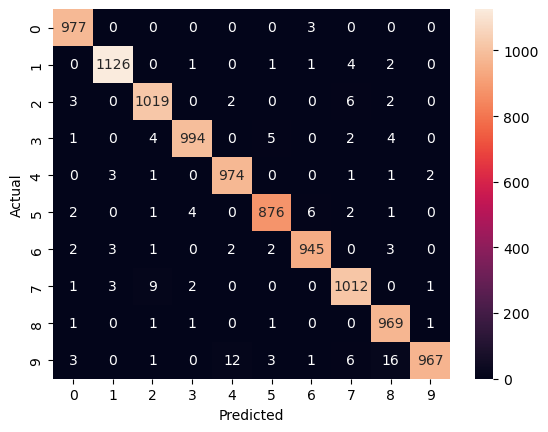

In [ ]:
# Create and plot a confusion matrix to see how well the model predicts each digit

# Get model predictions for the test images
test_predictions = model.predict(x=x_test)

# Convert predictions to digit labels (0-9)
test_predictions = np.argmax(test_predictions,axis=1) # Pick the highest probability as the predicted digit

# Generate the confusion matrix comparing actual vs predicted labels
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=test_predictions)

# Plot the confusion matrix for easy visualization
import seaborn as sns
import matplotlib.pyplot as plt
h = sns.heatmap(confusion_matrix,annot=True,fmt='d') # Show numbers in each cell
h.set(xlabel='Predicted', ylabel='Actual') # Label axes

## Upload to bucket

In [ ]:
from minio import Minio
import os

# Create a MinIO client to connect to the object storage
minio_client = Minio(
    "minio-service.kubeflow:9000", # MinIO server address
    access_key="minio", # Access key for authentication
    secret_key="minio123", # Secret key for authentication
    secure=False # Use HTTP (not HTTPS)
 )

# Function to upload all files from a local directory to a MinIO bucket
def upload_model_to_minio(local_dir, bucket, prefix):
    for root, _, files in os.walk(local_dir): # Walk through all files in the directory
        for fname in files:
            path = os.path.join(root, fname) # Full path to the file
            rel = os.path.relpath(path, local_dir) # Relative path for storage
            key = os.path.join(prefix, rel).replace(os.sep, "/") # Object key in MinIO
            minio_client.fput_object(bucket, key, path) # Upload the file

# Upload the exported model to the MinIO bucket for later use
upload_model_to_minio("./tmp/detect-digits", "mlpipeline", "models/digits")

## Load model and check it's signature

In [ ]:
# Load the exported TensorFlow SavedModel for inference
model = tf.saved_model.load("./tmp/detect-digits/1")

# Get the default inference function from the model
infer = model.signatures["serving_default"]
print(infer.structured_input_signature) # Print the input signature to see what inputs the model expects

((), {'input_image': TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_image')})
